# Cферический случай

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 1.4

In [3]:
# Начальные данные
def initial_conditions(nx, x):
    gamma = 1.4  # Коэффициент адиабаты
    rho = np.ones(nx)  # Плотность
    u = np.zeros(nx)   # Скорость
    p = np.ones(nx)    # Давление
    # Установка начальных условий (например, ударная волна)
    index1 = [i for i in range(nx) if x[i]<0.1]
    index2 = [i for i in range(nx) if x[i]>0.1]
    rho[index2] = np.power(min(x[index2])/x[index2], 2)
    p[index2] = 0.1
    #u[index2] = 0
    q = np.zeros((3,nx))
    q[0] = rho
    q[1] = rho*u
    q[2] = p/(gamma-1)+0.5*rho*np.power(u,2)
    
    return q


In [ ]:
# Функция для вычисления flux
#np.seterr(all='warn')
def calc_flux(q, r):
    gamma = 1.4  # Коэффициент адиабаты
    rho = q[0]
    u = q[1]/q[0]
    p = (gamma-1)*(q[2]-0.5*q[0]*u**2)
    return np.array([q[1]*r**2,(q[1]*u+p)*r**2,u*(q[2]+p)*r**2])


In [40]:
# Функция для метода Годунова
def godunov_method(dx, dt, q, nx):
    q_half = np.zeros((3,nx))
    pi = np.pi
    #q_half[:,0] = q[:,1]
    # Вычисление flux на границах ячеек
    #F1, F2, F3 = calc_flux(rho, u, p)
    for i in range(1,nx):
        f_right = calc_flux(q[:, i], i*dx)
        if i == 0:
            f_left = f_right
            q_prev = q[:,i]
        else:
            f_left = calc_flux(q[:, i-1], (i-1)*dx)
            q_prev = q[:,i-1]
        V_i = 4*pi*(i**2 - (i-1)**2)*dx**2
        r =  (i-0.5)*dx
        q_half[:,i] = 0.5*(q[:,i]+q_prev) - 0.5*dt/r**2*(f_right-f_left)
    return q_half


In [41]:
def Calc_step(q_start, t_start, t_stop, dt, dx, nx):
    q = q_start
    tau = t_start
    T = t_stop
    print(q)
    while tau < T:
        q_half = godunov_method(dx, dt, q, nx)
        
        q = godunov_method(dx, dt, q_half, nx)
        tau += dt
    print(T,":",q)
    #dt = 0.9 * dx / np.max(np.abs(q[1]/q[0])+np.sqrt(gamma*q[2]/q[0]))
    return q, dt

In [42]:
# Визуализация результатов
def Visualization(q_full, x):
    gamma = 1.4 # Коэффициент адиабаты
    print("SIZE:", q_full.shape[0])
    plt.figure(figsize=(12, 8))
    
    for i in range(q_full.shape[0]):
        q = q_full[i]
        rho = q[0]
        plt.subplot(5, 1, 1)
        plt.plot(x, rho, label='Плотность')
        plt.xlim([-0.1,1])
        plt.title('Плотность')
        
        plt.subplot(5, 1, 2)
        plt.plot(x,  q[1]/q[0], label='Скорость')
        plt.xlim([-0.1,1])
        plt.title('Скорость')
        
        plt.subplot(5, 1, 3)
        p = (gamma-1)*(q[2] - 0.5*q[1]**2/q[0])
        plt.plot(x, p, label='Давление')
        plt.xlim([-0.1,1])
        plt.title('Давление')
    
        plt.subplot(5, 1, 4)
        plt.plot(x,  q[2], label='Энергия')
        plt.xlim([-0.1,1])
        plt.title('Энергия')
    
        plt.subplot(5, 1, 5)
        plt.plot(x, p/rho, label = 'Температура')
        plt.xlim([-0.1,1])
        plt.title('Температура')
        plt.tight_layout()
 
        #plt.hold(True)
    plt.show()

In [43]:
def Solution(T):
    gamma = 1.4  # Коэффициент адиабаты
    nx = 600  # Количество ячеек
    dx = 1.0 / nx  # Шаг по пространству
    x = np.linspace(0, 1.0, nx)
    
    q_init = np.zeros((3,nx))
    q_init = initial_conditions(nx,x)
    dt = 0.9 * dx / np.max(np.abs(q_init[1]/q_init[0])+np.sqrt(gamma*q_init[2]/q_init[0]))
    print('dt:', dt)
    N = 5
    q_full = np.zeros((N,3,nx))
    q_full[0], dt = Calc_step(q_init, 0.0, 0.0, dt, dx, nx)
    print('dt:', dt)
    #print(q_full[-1])
    for i in range(1,N):
        q_full[i], dt = Calc_step(q_full[i-1], (i-1)*T/N, i*T/N, dt, dx, nx)
        print('dt:', dt)
    
    print("size:", q_full.shape[0])
    Visualization(q_full, x)
    return x, q_full

dt: 0.00025396955901691646
[[1.         1.         1.         ... 0.01010076 0.010067   0.01003342]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.5        2.5        2.5        ... 0.25       0.25       0.25      ]]
0.0 : [[1.         1.         1.         ... 0.01010076 0.010067   0.01003342]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.5        2.5        2.5        ... 0.25       0.25       0.25      ]]
dt: 0.00025396955901691646
[[1.         1.         1.         ... 0.01010076 0.010067   0.01003342]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [2.5        2.5        2.5        ... 0.25       0.25       0.25      ]]
0.004 : [[ 0.00000000e+00             nan             nan ...  1.06654975e-02
   1.06288751e-02  1.05924412e-02]
 [ 0.00000000e+00             nan             nan ... -1.38048710e-06
  -1.37814596e-06 -1.37581275e-06]
 [ 0.00000000e+00             nan             nan ...  2.50000

C:\Users\izavo\AppData\Local\Temp\ipykernel_31312\853721854.py:6: RuntimeWarning: invalid value encountered in scalar divide
  u = q[1]/q[0]


0.008 : [[ 0.00000000e+00             nan             nan ...  1.12790084e-02
   1.12391825e-02  1.11995671e-02]
 [ 0.00000000e+00             nan             nan ... -2.79957916e-06
  -2.79476415e-06 -2.78996568e-06]
 [ 0.00000000e+00             nan             nan ...  2.50000002e-01
   2.50000002e-01  2.50000002e-01]]
dt: 0.00025396955901691646
[[ 0.00000000e+00             nan             nan ...  1.12790084e-02
   1.12391825e-02  1.11995671e-02]
 [ 0.00000000e+00             nan             nan ... -2.79957916e-06
  -2.79476415e-06 -2.78996568e-06]
 [ 0.00000000e+00             nan             nan ...  2.50000002e-01
   2.50000002e-01  2.50000002e-01]]
0.012 : [[ 0.00000000e+00             nan             nan ...  1.19470750e-02
   1.19036602e-02  1.18604817e-02]
 [ 0.00000000e+00             nan             nan ... -4.25949973e-06
  -4.25206652e-06 -4.24465921e-06]
 [ 0.00000000e+00             nan             nan ...  2.50000004e-01
   2.50000004e-01  2.50000004e-01]]
dt: 0.000

C:\Users\izavo\AppData\Local\Temp\ipykernel_31312\1828665980.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,  q[1]/q[0], label='Скорость')
C:\Users\izavo\AppData\Local\Temp\ipykernel_31312\1828665980.py:21: RuntimeWarning: invalid value encountered in divide
  p = (gamma-1)*(q[2] - 0.5*q[1]**2/q[0])


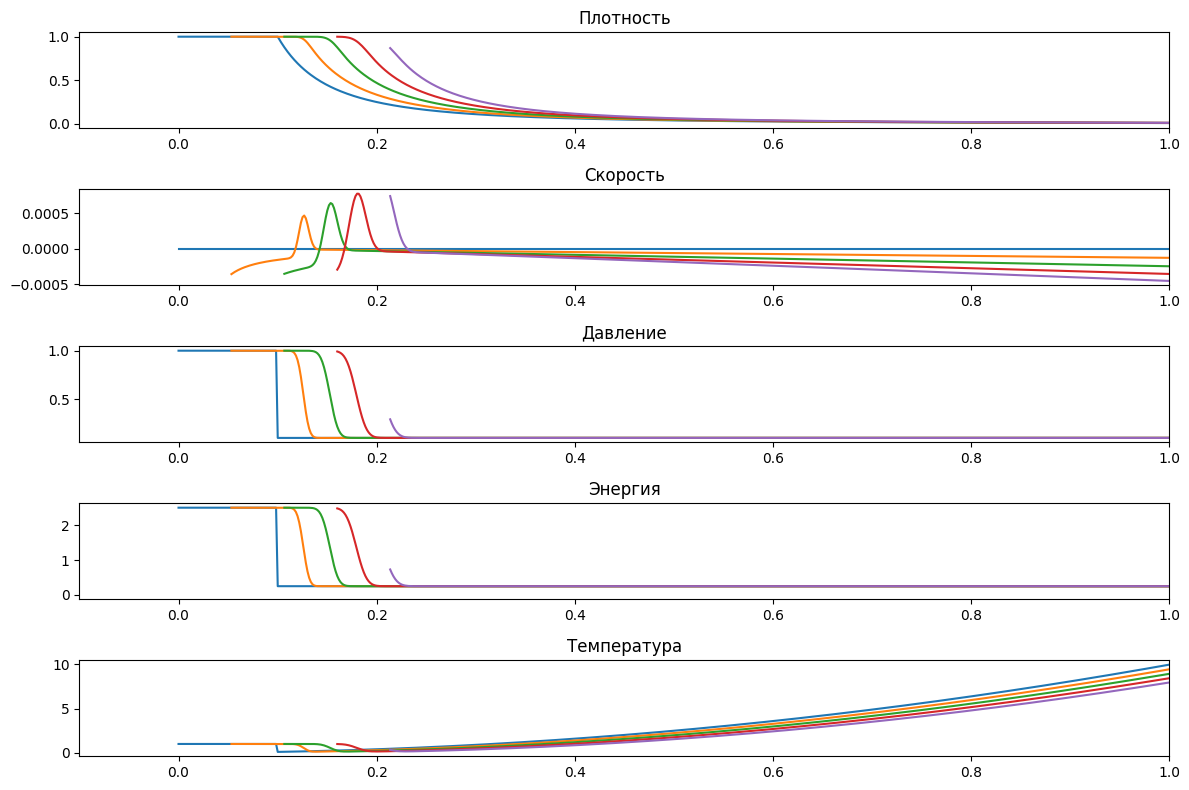

In [44]:
T = float(input())    
x1, q1 = Solution(T)

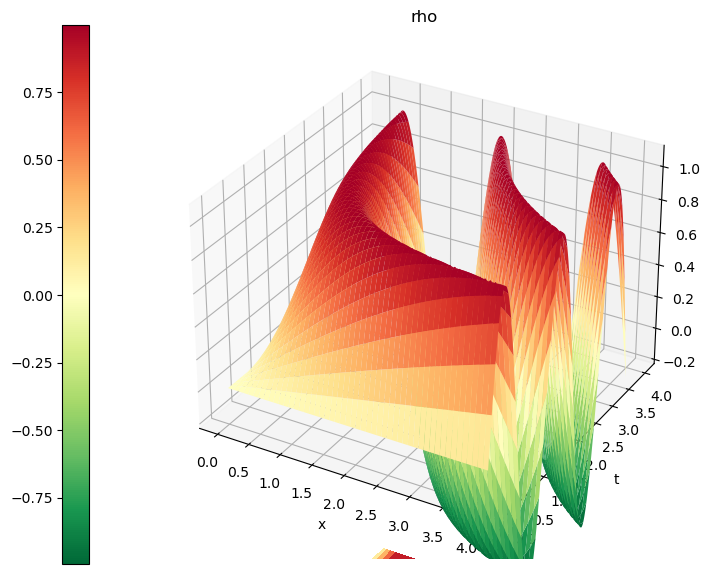

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(x * y)
  
x = np.linspace(0, 4, 1000)

y = np.linspace(0, 4, 1000)

xx, yy = np.meshgrid(x, y)
#print(x, xx, "y\n", y, yy)
zz = f(xx, yy)

fig = plt.figure(figsize=(20, 7))

def show_3d(xx, yy, zz, fig):
 
    ax = fig.add_subplot(121, projection="3d")

    surf = ax.plot_surface(xx, yy, zz, cmap=plt.cm.RdYlGn_r)

    ax.contourf(xx, yy, zz, zdir="zz", offset=-2, cmap="RdYlGn_r")

    ax.set_zlim(-0.2, 1.1)

    ax.set_xlabel("x")

    ax.set_ylabel("t")

    ax.set_title("rho")

    fig.colorbar(surf, location="left")

show_3d(xx, yy, zz, fig)

plt.show()

In [10]:
nx1 = 600
x1 = np.linspace(0, 1.0, nx)
rho = q1[:,0,:]
#print(rho.shape)
#plt.subplot(5, 1, 1)
#plt.plot(x, rho, label='Плотность')
#plt.xlim([-0.1,1.1])
#plt.title('Плотность')

y1 = np.linspace(0, 0.05, 10)
print(y1.shape)
xx1, yy1 = np.meshgrid(x1, y1)
zz1 = q1[:,0,:]
fig = plt.figure(figsize=(20, 7))
show_3d(xx1, yy1, zz1, fig)

plt.show()

NameError: name 'nx' is not defined

### Задача о распаде разрыва

### Формулы из 
"Точный римановский солвер в алгоритмах решения задач многокомпонентной газовой динамики"
 В. Е. Борисов, Ю. Г. Рыков



In [ ]:
def f(P,p_i,rho_i):
    ans = 0.0
    gamma = 1.4
    pi_i = P/p_i
    c_i = np.sqrt(gamma*p_i/rho_i)
    if P < p_i:
        ans = 2/(gamma-1)*c_i*(np.power(pi_i, (gamma-1)/2*gamma)-1)
    else:
        ans = (P-p_i)/(rho_i*c_i*np.sqrt((gamma+1)*pi_i/(2*gamma)+(gamma-1)/(2*gamma)))
    return ans           


In [ ]:
p1 = 1
p2 = 0.1
rho1 = 10
rho2 = 0.125
def F(P):
    return f(P,p1,rho1)+f(P,p2,rho2)

2.304663838792128 -2.8112769774960804


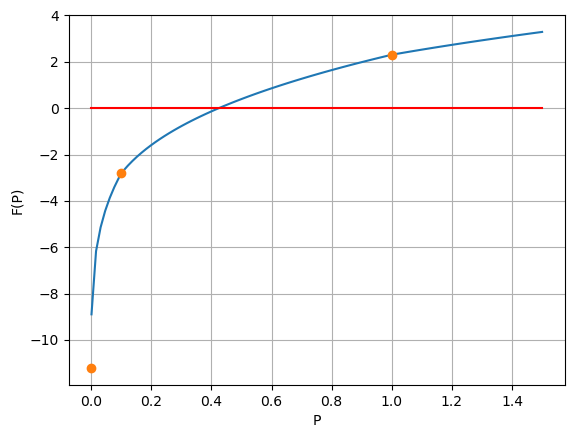

In [36]:
u1 = 0.0
u2 = 0.0
U_shock = F(p2)
U_rare = F(p1)
U_vac = F(0)
print(U_rare, U_shock)
p_full = np.linspace(0.001, 1.5, 100)
F_full = np.linspace(0.001, 1.5, 100)
for i in range(100):
    F_full[i] = F(p_full[i]) 
plt.plot(p_full, F_full)
plt.ylabel('F(P)')
plt.xlabel('P')
plt.plot([p1,p2,0], [U_rare,U_shock,U_vac], 'o')
plt.plot([p_full[0],p_full[-1]],[u1-u2, u1-u2], 'r')
plt.grid(True)

Раз $\Delta u = u_1-u_2 \in [u_{rare}, u_{shock}]$, то конфигурация УВ-ВР  
Если $\Delta u < u_{rare}$, то конфигурация ВР-ВР  
Если $\Delta u > u_{shock}$, то конфигурация УВ-УВ

In [37]:
def newton_method(f, x0, x1, eps=1e-5):
    x_prev, x = x0, x1
    while abs(x-x_prev) >= eps:
        x_prev, x = (x, x-f(x)*(x-x_prev)/(f(x)-f(x_prev)))
    return x
def g(x):
    return F(x) - (u1-u2)
P = newton_method(g, 0.1, 0.5)
print(P)

0.4245891839108944


In [45]:
def a1(P):
    gamma = 1.4
    ans = 0.0
    c1 = 0.0
    pi1 = P/p1
    if P > p1:
        ans = np.sqrt(rho1*(gamma+1)*P/2+(gamma-1)*p1/2)
    else: 
        ans = (gamma-1)/(2*gamma)*rho1*np.sqrt(gamma*p1/rho1)*(1-pi1)/(1-np.power(pi1,(gamma-1)/2/gamma))
    return ans


In [46]:
def a2(P):
    gamma = 1.4
    ans = 0.0
    c2 = 0.0
    pi2 = P/p2
    if P > p2:
        ans = np.sqrt(rho2*(gamma+1)*P/2+(gamma-1)*p2/2)
    else: 
        ans = (gamma-1)/(2*gamma)*rho2*np.sqrt(gamma*p2/rho2)*(1-pi2)/(1-np.power(pi2,(gamma-1)/2/gamma))
    return ans

In [47]:
A1 = a1(P)
A2 = a2(P)
U_contact = (A1*u1+A2*u2+p1-p2)/(A1+A2)

In [51]:
print(U_contact)

0.7938660372807017


In [50]:
D_left = u1 - A1/rho1
D_right = u2 + A2/rho2